El objetivo de este proyecto es la diferenciacion de Setas Comestibles y Venenosas en todo el dataset, mediante el analisis de sus partes como el tallo, la cabeza, sus colores, fragancias, su habitat, etc.
La problematica encontrada seria desarrollar un modelo que pueda tener acceso a diversa cantidad de setas y su clasificacion, aprendiendo asi con nuevas setas a clasificarlas, disminuyendo el trabajo manual y dando oportunidad a un avance cientifico.

**<h3>Contexto Comercial<h3>**

Este proyecto sale de un documental que vi hace unos meses en donde mostraban la gran variedad de setas en el mundo y el estudio que conlleva, desperto mi interes el tener acceso a datos de setas con su clasificacion. Lo primero que vino a mi mente fue "Hay que automatizar la clasificacion de las setas" y generar un aporte a la ciencia. 

**<h3>Conexto analitico<h3>**

De un archivo .xlsx se extraeran datos de una muestra de setas, este consta de variables tipo categorica las cuales se las  debera modificar para poder trabajar con ellas. Tambien se determinaran diferentes conclusiones para analizar que variables son mas importantes para la creacion del modelo.

 **<h3>Preguntas de interes<h3>**

Se quiere distinguir visualmente las setas mediante un modelo de clasificacion, que discrimine entre Comestibles y Venenosas. Esto mediante el analisis de las caracteristicas visuales de cada seta en la muestra. Surgen muchas preguntas con un tema muy poco conocido, por lo que escogi las principales:
* Que color predomina en una seta venenosa?
* Tiene un tallo peculiar una seta comestible?
* Que fragancias confundirian la distincion?
* Si contiene moretones, esto aumenta o disminuye la posibilidad de que la seta sea venenosa?
* El Habitat tiene relacion con la Poblacion?
* El tamanno de las branquias y el tipo de cabeza, tienen alguna relacion entre si?

In [4]:
#Herramientas
import pandas as pd
import numpy as np
import missingno as msno
import os
import joblib
#Algoritmos
#from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import plot_tree
#from sklearn.tree import export_graphviz
#from sklearn.tree import export_text
#from sklearn.model_selection import KFold

#from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
#from sklearn.pipeline import Pipeline

#from sklearn.model_selection import StratifiedKFold, cross_validate

#Hipertunning
#from sklearn.model_selection import GridSearchCV

#Metricas
from sklearn.metrics import classification_report,accuracy_score
#Codificacion de variables
from category_encoders import one_hot
from scipy.stats import chi2_contingency
from sklearn import preprocessing

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats

Extraigo mi conjunto de datos desde una hoja de calculo

In [5]:
data=pd.read_excel("Libro2.xlsx")
data.head(5)

,ID,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


Traduzco los nombres de las variables

In [6]:
data.rename({'class':'Clase',
'cap-shape':'TipoCabeza',
'cap-surface':'SuperficieCabeza',
'cap-color':'ColorCabeza',
'bruises':'Moretones',
'odor':'Fragancia',
'gill-attachment':'AccesorioBranquial',
'gill-spacing':'EspacioBranquias',
'gill-size':'TamannoBranquia',
'gill-color':'ColorBranquia',
'stalk-shape':'FormaTallo',
'stalk-root':'Volva',
'stalk-surface-above-ring':'SuperficieSuperioralAnillo',
'stalk-surface-below-ring':'SuperficieInferioralAnillo',
'stalk-color-above-ring':'ColorTalloSuperioralAnillo',
'stalk-color-below-ring':'ColorTalloInferioralAnillo',
'veil-type':'TipoVelo',
'veil-color':'ColorVelo',
'ring-number':'CantidadAnillos',
'ring-type':'TipoAnillo',
'spore-print-color':'ColorImpresionEsporas',
'population':'Poblacion',
'habitat':'Habitat',
},axis=1,inplace=True)
data.head(5)

,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


Realizo una traduccion de las categorias de cada variable para un mejor entendimiento

In [7]:
data.Clase=data.Clase.replace({'p':'venenosa','e':'comestible'})
data.TipoCabeza=data.TipoCabeza.replace({'b':'campana','c':'conica','x':'convexa','f':'plana','k':'protuberante','s':'hundida'})
data.SuperficieCabeza=data.SuperficieCabeza.replace({'f':'fibrosa','g':'ranuras','y':'escamosa','s':'lisa'})
data.ColorCabeza=data.ColorCabeza.replace({'n':'marron','b':'beige','c':'canela','g':'gris','r':'verde','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data.Moretones=data.Moretones.replace({'t':'si','f':'no'})
data.Fragancia=data.Fragancia.replace({'a':'almendra','l':'anis','c':'creosota','y':'pescado','f':'fetido','m':'mohoso','n':'inoloro','p':'acre','s':'especiado'})
data.AccesorioBranquial=data.AccesorioBranquial.replace({'a':'adjunto','d':'descendente','f':'libre','n':'ranurado'})
data.EspacioBranquias=data.EspacioBranquias.replace({'c':'cerca','w':'abarrotado','d':'distante'})
data.TamannoBranquia=data.TamannoBranquia.replace({'b':'ancho','n':'estrecho'})
data.ColorBranquia=data.ColorBranquia.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','g':'gris','r':'verde','o':'naranja','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data.FormaTallo=data.FormaTallo.replace({'e':'agrandando','t':'disminuyendo'})
data.Volva=data.Volva.replace({'b':'bulboso','c':'club','u':'copa','e':'igual','z':'rizomorfos','r':'enraizado','?':'faltante'})
data.SuperficieSuperioralAnillo=data.SuperficieSuperioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data.SuperficieInferioralAnillo=data.SuperficieInferioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data.ColorTalloSuperioralAnillo=data.ColorTalloSuperioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data.ColorTalloInferioralAnillo=data.ColorTalloInferioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data.TipoVelo=data.TipoVelo.replace({'p':'parcial','u':'universal'})
data.ColorVelo=data.ColorVelo.replace({'n':'marron','o':'naranja','w':'blanco','y':'amarillo'})
data.CantidadAnillos=data.CantidadAnillos.replace({'n':'ninguno','o':'uno','t':'dos'})
data.TipoAnillo=data.TipoAnillo.replace({'c':'telaranna','e':'evanecente','f':'flaring','l':'grande','n':'ninguno','p':'colgante','s':'revestimiento','z':'local'})
data.ColorImpresionEsporas=data.ColorImpresionEsporas.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','r':'verde','o':'naranja','u':'violeta','w':'blacno','y':'amarillo'})
data.Poblacion=data.Poblacion.replace({'a':'abundante','c':'agrupada','n':'numerosa','s':'dispersa','v':'diversa','y':'solitaria'})
data.Habitat=data.Habitat.replace({'g':'pastos','l':'hojas','m':'prados','p':'senderos','u':'urbano','d':'bosques','w':'residuos'})
data.head(5)

,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,1,venenosa,convexa,lisa,marron,si,acre,libre,cerca,estrecho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,dispersa,urbano
1,2,comestible,convexa,lisa,amarillo,si,almendra,libre,cerca,ancho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marron,numerosa,pastos
2,3,comestible,campana,lisa,blanco,si,anis,libre,cerca,ancho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marron,numerosa,prados
3,4,venenosa,convexa,escamosa,blanco,si,acre,libre,cerca,estrecho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,dispersa,urbano
4,5,comestible,convexa,lisa,gris,no,inoloro,libre,abarrotado,ancho,...,liso,blanco,blanco,parcial,blanco,uno,evanecente,marron,abundante,pastos


Realizo LabelEncoding para poder graficar y realizar el analisis

In [8]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])
data_encoded.head(5)

,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,0,1,2,2,5,1,0,1,1,1,...,2,2,2,0,1,2,0,6,2,6
1,1,0,2,2,0,1,1,1,1,0,...,2,2,2,0,1,2,0,4,4,2
2,2,0,0,2,2,1,2,1,1,0,...,2,2,2,0,1,2,0,4,4,3
3,3,1,2,0,2,1,0,1,1,1,...,2,2,2,0,1,2,0,6,2,6
4,4,0,2,2,4,0,6,1,0,0,...,2,2,2,0,1,2,1,4,0,2


<AxesSubplot: >

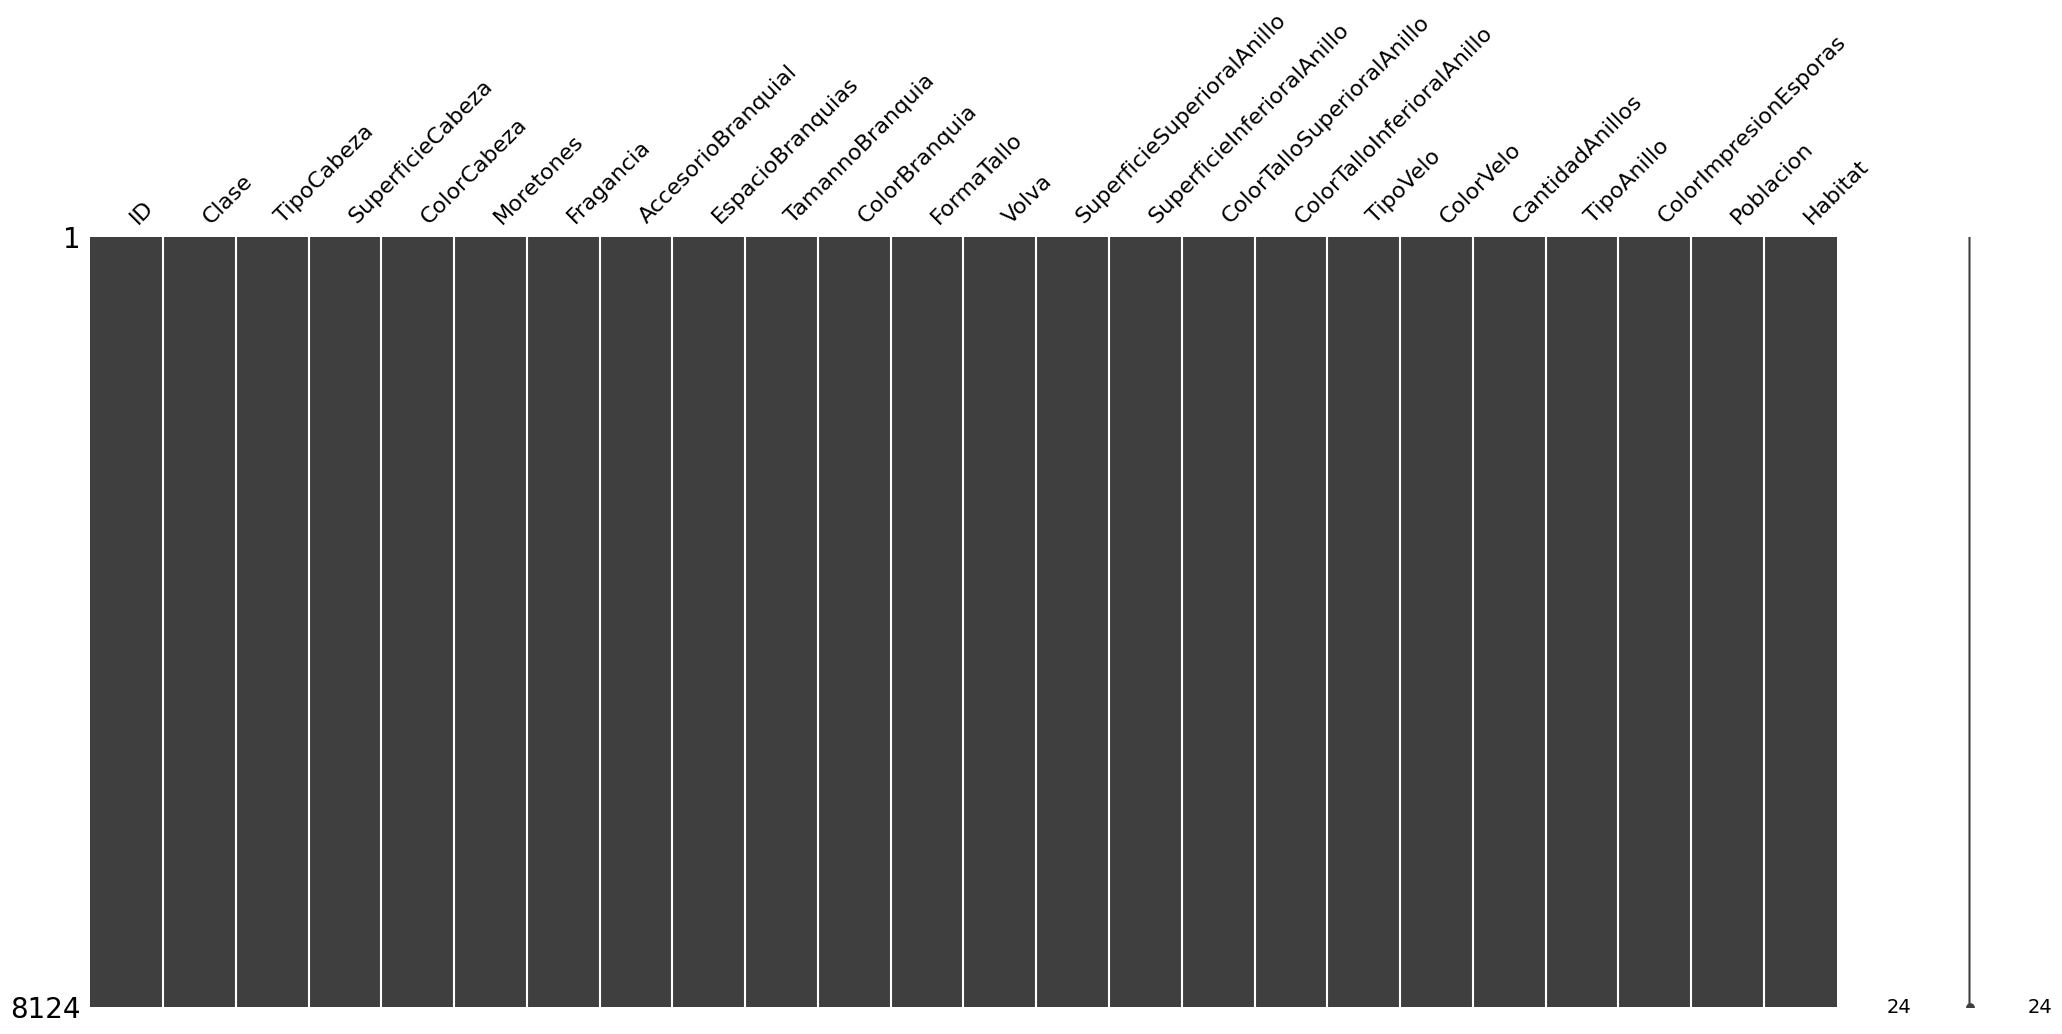

In [9]:
msno.matrix(data_encoded)

Verificacion de inexistencia sobre valores nulos

In [10]:
data_encoded.isnull().sum()

ID                            0
Clase                         0
TipoCabeza                    0
SuperficieCabeza              0
ColorCabeza                   0
Moretones                     0
Fragancia                     0
AccesorioBranquial            0
EspacioBranquias              0
TamannoBranquia               0
ColorBranquia                 0
FormaTallo                    0
Volva                         0
SuperficieSuperioralAnillo    0
SuperficieInferioralAnillo    0
ColorTalloSuperioralAnillo    0
ColorTalloInferioralAnillo    0
TipoVelo                      0
ColorVelo                     0
CantidadAnillos               0
TipoAnillo                    0
ColorImpresionEsporas         0
Poblacion                     0
Habitat                       0
dtype: int64

Tratamiento de Valores erroneos

Reemplazo el valor '?' de la variable Volva por la Moda de la misma. 

In [11]:
Moda=pd.Series(data[['Volva']].values.flatten()).mode()[0] #Obtengo un vector de la dimension original de la variable, lo "aplano" a una sola dimension y lo transformo en una serie para poder utilizar el metodo mode()
data.Volva=data.Volva.replace({"?": Moda})
Moda=pd.Series(data_encoded[['Volva']].values.flatten()).mode()[0] #Obtengo un vector de la dimension original de la variable, lo "aplano" a una sola dimension y lo transformo en una serie para poder utilizar el metodo mode()
data_encoded.Volva=data_encoded.Volva.replace({"?": Moda})

In [20]:
print(data_encoded.columns)

Index(['ID', 'Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza',
       'Moretones', 'Fragancia', 'AccesorioBranquial', 'EspacioBranquias',
       'TamannoBranquia', 'ColorBranquia', 'FormaTallo', 'Volva',
       'SuperficieSuperioralAnillo', 'SuperficieInferioralAnillo',
       'ColorTalloSuperioralAnillo', 'ColorTalloInferioralAnillo', 'TipoVelo',
       'ColorVelo', 'CantidadAnillos', 'TipoAnillo', 'ColorImpresionEsporas',
       'Poblacion', 'Habitat'],
      dtype='object')


Analisis Univariado

Text(0.5, 1.0, 'Habitat')

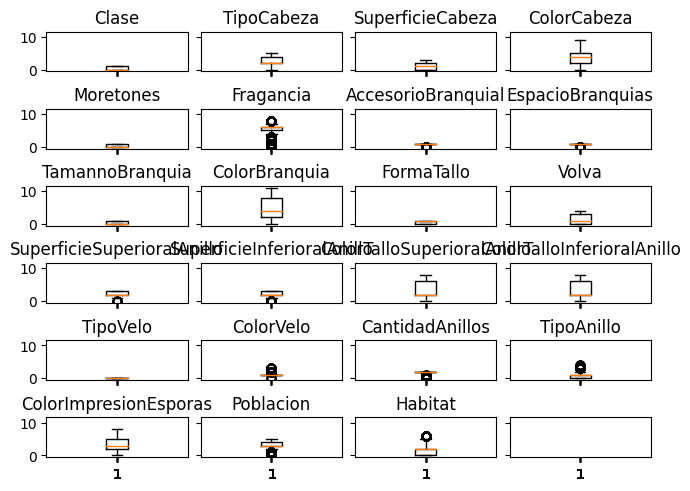

In [23]:
fig, axs = plt.subplots(6, 4,sharex=True,sharey=True, layout='constrained')

axs[0,0].boxplot(data_encoded['Clase'])
axs[0,0].set_title('Clase')

axs[0,1].boxplot(data_encoded['TipoCabeza'])
axs[0,1].set_title('TipoCabeza')

axs[0,2].boxplot(data_encoded['SuperficieCabeza'])
axs[0,2].set_title('SuperficieCabeza')

axs[0,3].boxplot(data_encoded['ColorCabeza'])
axs[0,3].set_title('ColorCabeza')

axs[1,0].boxplot(data_encoded['Moretones'])
axs[1,0].set_title('Moretones')

axs[1,1].boxplot(data_encoded['Fragancia'])
axs[1,1].set_title('Fragancia')

axs[1,2].boxplot(data_encoded['AccesorioBranquial'])
axs[1,2].set_title('AccesorioBranquial')

axs[1,3].boxplot(data_encoded['EspacioBranquias'])
axs[1,3].set_title('EspacioBranquias')

axs[2,0].boxplot(data_encoded['TamannoBranquia'])
axs[2,0].set_title('TamannoBranquia')

axs[2,1].boxplot(data_encoded['ColorBranquia'])
axs[2,1].set_title('ColorBranquia')

axs[2,2].boxplot(data_encoded['FormaTallo'])
axs[2,2].set_title('FormaTallo')

axs[2,3].boxplot(data_encoded['Volva'])
axs[2,3].set_title('Volva')

axs[3,0].boxplot(data_encoded['SuperficieSuperioralAnillo'])
axs[3,0].set_title('SuperficieSuperioralAnillo')

axs[3,1].boxplot(data_encoded['SuperficieInferioralAnillo'])
axs[3,1].set_title('SuperficieInferioralAnillo')

axs[3,2].boxplot(data_encoded['ColorTalloSuperioralAnillo'])
axs[3,2].set_title('ColorTalloSuperioralAnillo')

axs[3,3].boxplot(data_encoded['ColorTalloInferioralAnillo'])
axs[3,3].set_title('ColorTalloInferioralAnillo')

axs[4,0].boxplot(data_encoded['TipoVelo'])
axs[4,0].set_title('TipoVelo')

axs[4,1].boxplot(data_encoded['ColorVelo'])
axs[4,1].set_title('ColorVelo')

axs[4,2].boxplot(data_encoded['CantidadAnillos'])
axs[4,2].set_title('CantidadAnillos')

axs[4,3].boxplot(data_encoded['TipoAnillo'])
axs[4,3].set_title('TipoAnillo')

axs[5,0].boxplot(data_encoded['ColorImpresionEsporas'])
axs[5,0].set_title('ColorImpresionEsporas')

axs[5,1].boxplot(data_encoded['Poblacion'])
axs[5,1].set_title('Poblacion')

axs[5,2].boxplot(data_encoded['Habitat'])
axs[5,2].set_title('Habitat')



Analisis Bivariado

Defino el cramer

In [25]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

Transformo el data set con el Valor de Cramer

In [26]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Redondeo el valor Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

C:\Users\Lauti\AppData\Local\Temp\ipykernel_14428\2586380831.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_14428\2586380831.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_14428\2586380831.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_14428\2586380831.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_14428\2586380831.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_14428\2586380831.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_14428\2586380831.py:6: RuntimeWarning: invalid value encountered in divide
  ret

C:\Users\Lauti\AppData\Local\Temp\ipykernel_14428\3511031460.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


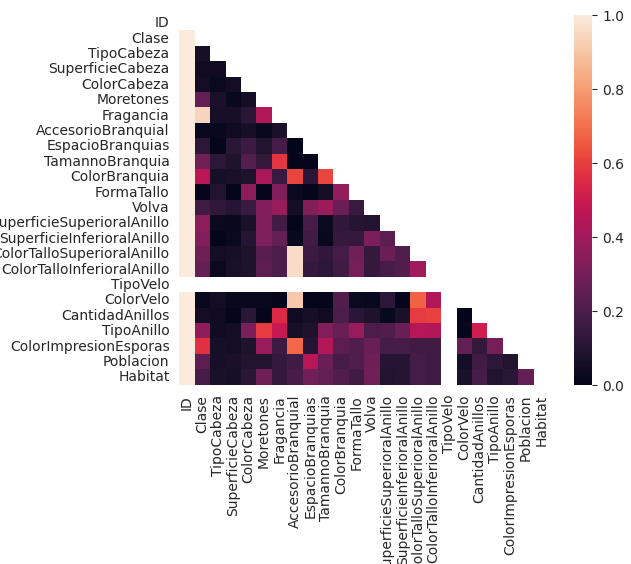

In [27]:
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

<h1>Seleccion de Variables</h1>

En este apartado se seleccionaron las variables cuya correlacion tenian importancia relevante para el modelo, por otro lado tambien se tuvieron en cuenta variables cuya correlacion no eran buena pero si tenian significancia en el analisis e influyen en objetivo del proyecto.

In [8]:
data.columns.values

array(['ID', 'Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza',
       'Moretones', 'Fragancia', 'AccesorioBranquial', 'EspacioBranquias',
       'TamannoBranquia', 'ColorBranquia', 'FormaTallo', 'Volva',
       'SuperficieSuperioralAnillo', 'SuperficieInferioralAnillo',
       'ColorTalloSuperioralAnillo', 'ColorTalloInferioralAnillo',
       'TipoVelo', 'ColorVelo', 'CantidadAnillos', 'TipoAnillo',
       'ColorImpresionEsporas', 'Poblacion', 'Habitat'], dtype=object)

In [9]:
Variables_quitar=['ID','AccesorioBranquial','EspacioBranquias','Volva','SuperficieSuperioralAnillo','SuperficieInferioralAnillo','ColorTalloSuperioralAnillo', 'ColorTalloInferioralAnillo', 'TipoVelo', 'ColorVelo','CantidadAnillos', 'TipoAnillo','ColorImpresionEsporas']
data=data.drop(labels=Variables_quitar, axis=1)
print(data.columns)

Index(['Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza', 'Moretones',
       'Fragancia', 'TamannoBranquia', 'ColorBranquia', 'FormaTallo',
       'Poblacion', 'Habitat'],
      dtype='object')


In [10]:
data.head(5)

,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,TamannoBranquia,ColorBranquia,FormaTallo,Poblacion,Habitat
0,venenosa,convexa,lisa,marron,si,acre,estrecho,negro,agrandando,dispersa,urbano
1,comestible,convexa,lisa,amarillo,si,almendra,ancho,negro,agrandando,numerosa,pastos
2,comestible,campana,lisa,blanco,si,anis,ancho,marron,agrandando,numerosa,prados
3,venenosa,convexa,escamosa,blanco,si,acre,estrecho,marron,agrandando,dispersa,urbano
4,comestible,convexa,lisa,gris,no,inoloro,ancho,negro,disminuyendo,abundante,pastos


<h2>Codificacion de variables categoricas</h2>

Separo las variables con mas categorias para realizar One Hot Encoding, y con las que poseen menos categorias aplicare Label Encoding

In [11]:
p=[data.Clase,data.Moretones,data.FormaTallo,data.TamannoBranquia]
m=[data.TipoCabeza,data.SuperficieCabeza,data.ColorCabeza,data.Fragancia,data.ColorBranquia,data.Poblacion,data.Habitat]
Muchas_categorias=pd.DataFrame(m)
Pocas_categorias=pd.DataFrame(p)
Pocas_categorias=Pocas_categorias.transpose()
Muchas_categorias=Muchas_categorias.transpose()

One Hot Encoding

In [12]:
ce_ohe=one_hot.OneHotEncoder(use_cat_names=True) #Inicio el codificador
ce_dummies=ce_ohe.fit_transform(Muchas_categorias) #Lo entreno
ce_dummies.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Poblacion_diversa,Poblacion_solitaria,Poblacion_agrupada,Habitat_urbano,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
ce_dummies=pd.DataFrame(ce_dummies)
data_set_trabajo=pd.concat([ce_dummies,Pocas_categorias], axis=1) #Concateno al dataset orifinal
data_set_trabajo.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas,Clase,Moretones,FormaTallo,TamannoBranquia
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,venenosa,si,agrandando,estrecho
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,comestible,si,agrandando,ancho
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,comestible,si,agrandando,ancho
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,venenosa,si,agrandando,estrecho
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,comestible,no,disminuyendo,ancho


Label Encoding

In [14]:
le = preprocessing.LabelEncoder()
data_set_trabajo['Clase']=le.fit_transform(data['Clase'])
data_set_trabajo['Moretones']=le.fit_transform(data['Moretones'])
data_set_trabajo['FormaTallo']=le.fit_transform(data['FormaTallo'])
data_set_trabajo['TamannoBranquia']=le.fit_transform(data['TamannoBranquia'])
data_set_trabajo.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas,Clase,Moretones,FormaTallo,TamannoBranquia
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Con el dataset codificado comienzo a crear el modelo de clasificacion